In [199]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Part A

## 1.A Read all the 3 CSV files as DataFrame and store them into 3 separate variables

In [17]:
norm_data = pd.read_csv("Normal.csv")
typeH_data = pd.read_csv("Type_H.csv")
typeS_data = pd.read_csv("Type_S.csv")

In [70]:
norm_data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [71]:
typeH_data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


## 1.B Print Shape and columns of all the 3 DataFrames.

In [21]:
norm_data.shape

(100, 7)

In [23]:
typeH_data.shape

(60, 7)

In [25]:
typeS_data.shape

(150, 7)

In [73]:
norm_data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [74]:
typeH_data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [75]:
typeS_data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

## 1.C Compare Column names of all the 3 DataFrames and clearly write observations

In [63]:
norm_data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [64]:
typeH_data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [76]:
typeS_data.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [81]:
# Coulmns in all three DataFrames

norm_data.columns.intersection(typeH_data.columns).intersection(typeS_data.columns)

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [80]:
# Columns difference in three DataFrames

norm_data.columns.difference(typeH_data.columns).difference(typeS_data.columns)

Index([], dtype='object')

#### Difference between column name of three Data Frame did not show anything so it means that there is not any difference in the column name of these Dataframes.

## 1.D. Print DataTypes of all the 3 DataFrames.

In [29]:
norm_data.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [30]:
typeH_data.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [50]:
typeS_data.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

## 1.E. Observe and share variation in ‘Class’ feature of all the 3 DataFrames

In [55]:
norm_data['Class'].unique()

array(['Normal', 'Nrmal'], dtype=object)

In [59]:
norm_data['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [56]:
typeH_data['Class'].unique()

array(['Type_H', 'type_h'], dtype=object)

In [60]:
typeH_data['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [57]:
typeS_data['Class'].unique()

array(['Type_S', 'tp_s'], dtype=object)

In [62]:
typeS_data['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

#### Class feature in all three dataframe has different values and in each dataframe also it has two type of values. In first Dataframe 'norm_data', we have two values Normal and Nrmal while in second Dataframe 'typeH_data', we have two values Type_H and type_h and finally, in the third Dataframe 'typeS_data', we again have two values, Type_S and tp_s

## 2. A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. 

In [ ]:
# we will make copy of all three dataframes, next activities will be done on copied data only

In [106]:
norm_data2 = norm_data.copy()
typeH_data2 = typeH_data.copy()
typeS_data2 = typeS_data.copy()

In [113]:
norm_data2['Class'].replace(to_replace='Nrmal', value='Normal' , inplace=True)
typeH_data2['Class'].replace(to_replace='type_h', value='Type_H' , inplace=True)
typeS_data2['Class'].replace(to_replace='tp_s', value='Type_S' , inplace=True)

In [114]:
norm_data2['Class'].value_counts()

Normal    100
Name: Class, dtype: int64

In [115]:
typeH_data2['Class'].value_counts()

Type_H    60
Name: Class, dtype: int64

In [116]:
typeS_data2['Class'].value_counts()

Type_S    150
Name: Class, dtype: int64

In [117]:
#'Class' feature now has only type of value in all three Dataframes

## 2.B. Combine all the 3 DataFrames to form a single DataFrame 

In [118]:
combined_Data = pd.concat([norm_data2, typeH_data2, typeS_data2], axis=0)

In [120]:
combined_Data.shape

(310, 7)

## 2.C. Print 5 random samples of this DataFrame 

In [126]:
combined_Data.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
57,52.862214,9.410372,46.988052,43.451842,123.091240,1.856659,Normal
129,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,Type_S
63,35.877571,1.112374,43.457257,34.765197,126.923906,-1.632238,Normal
30,81.656032,28.748869,58.232821,52.907163,114.769856,30.609148,Type_S
93,57.286945,15.149350,64.000000,42.137595,116.735387,30.341203,Type_S


## 2.D. Print Feature-wise percentage of Null values

In [127]:
combined_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [146]:
len(combined_Data['P_incidence'])

310

In [149]:
combined_Data['P_incidence'].isnull().sum()

0

In [150]:
percent_missing = combined_Data.isnull().sum() * 100 / len(combined_Data)
missing_value_df = pd.DataFrame({'column_name': combined_Data.columns,
                                 'percent_missing': percent_missing})

In [151]:
missing_value_df

,column_name,percent_missing
P_incidence,P_incidence,0.0
P_tilt,P_tilt,0.0
L_angle,L_angle,0.0
S_slope,S_slope,0.0
P_radius,P_radius,0.0
S_Degree,S_Degree,0.0
Class,Class,0.0


## 2.E. Check 5-point summary of the new DataFrame

<AxesSubplot:>

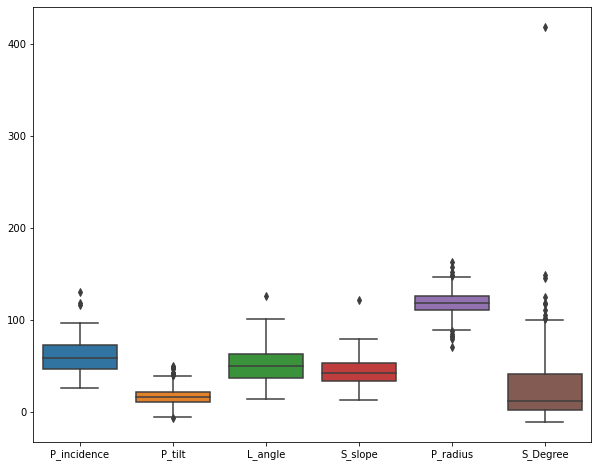

In [158]:
plt.figure(figsize=(10,8))
sns.boxplot(data=combined_Data)

## 3. A. Visualize a heatmap to understand correlation between all features

<AxesSubplot:>

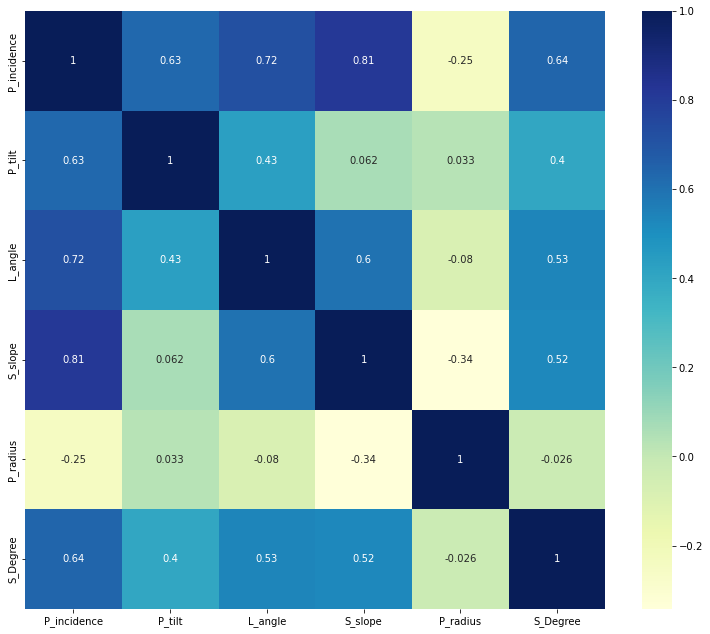

In [172]:
plt.figure(figsize=(13,11))
combined_Data_updated = combined_Data.drop(columns='Class')
sns.heatmap(combined_Data_updated.corr(), annot=True, cmap="YlGnBu")

## 3.B. Share insights on correlation.
### A. Features having stronger correlation with correlation value.

#### From the above heatmap, we can see that features 'P_incidence' and 'S_slope' have stronger correlation values. 

#### Also, features 'P_incidence' and 'L_angle' have stronger correlation values.

### B. Features having weaker correlation with correlation value

#### Following feature pairs are having weaker correlation value:

i.   P_radius and S_Degree
ii.  P_radius and L_angle
iii. P_radius and P_incidence
iv.  P_radius and S_slope

## 3.C. Visualize a pairplot with 3 classes distinguished by colors and share insights

/Users/manishsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

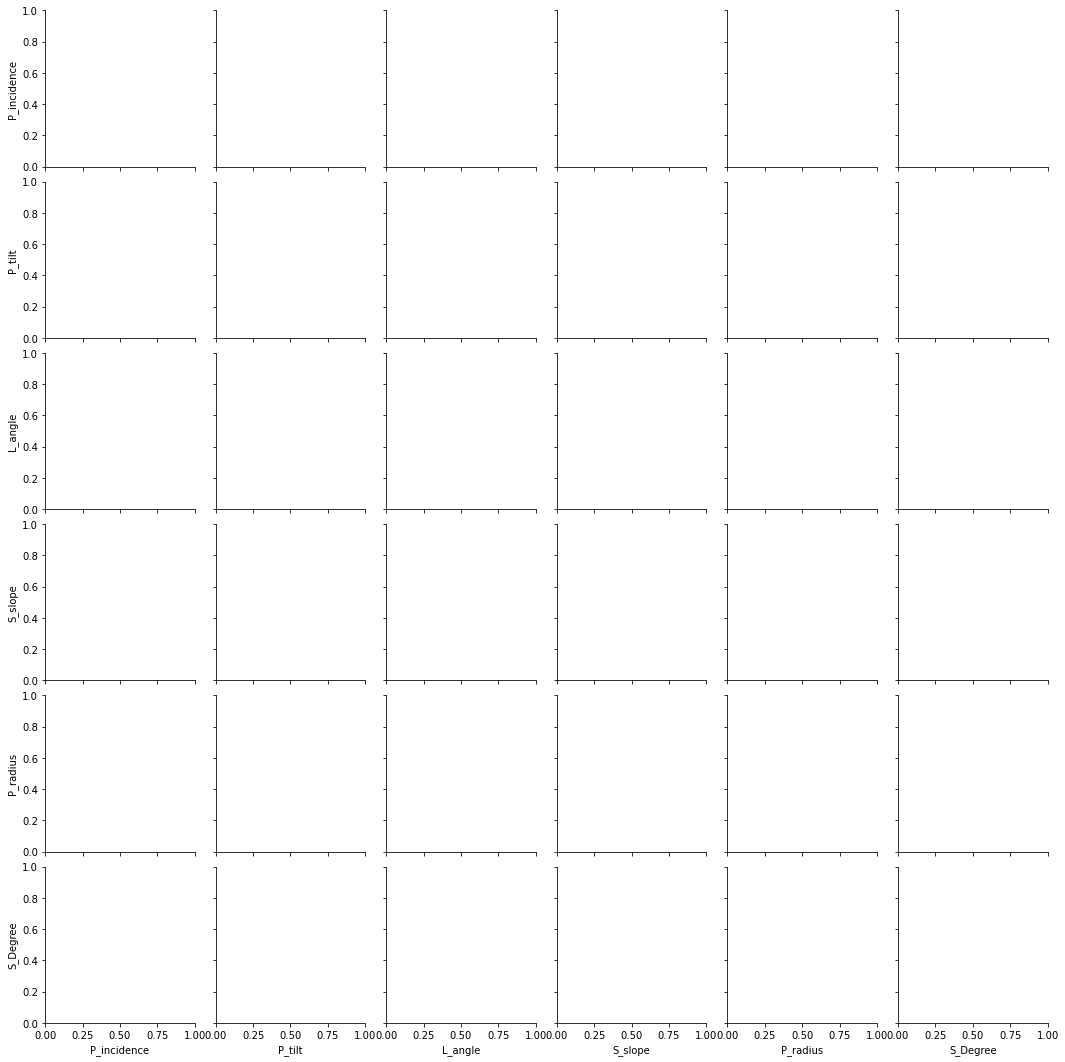

In [534]:
sns.pairplot(data=combined_Data)

## 3.D.Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

/Users/manishsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

<Figure size 936x792 with 0 Axes>

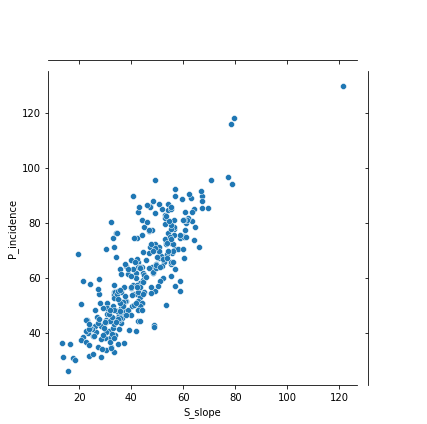

In [191]:
plt.figure(figsize=(13,11))
sns.jointplot(data=combined_Data, x='S_slope' , y='P_incidence', kind='scatter');

### 3.E. Visualize a boxplot to check distribution of the features and share insights

<AxesSubplot:>

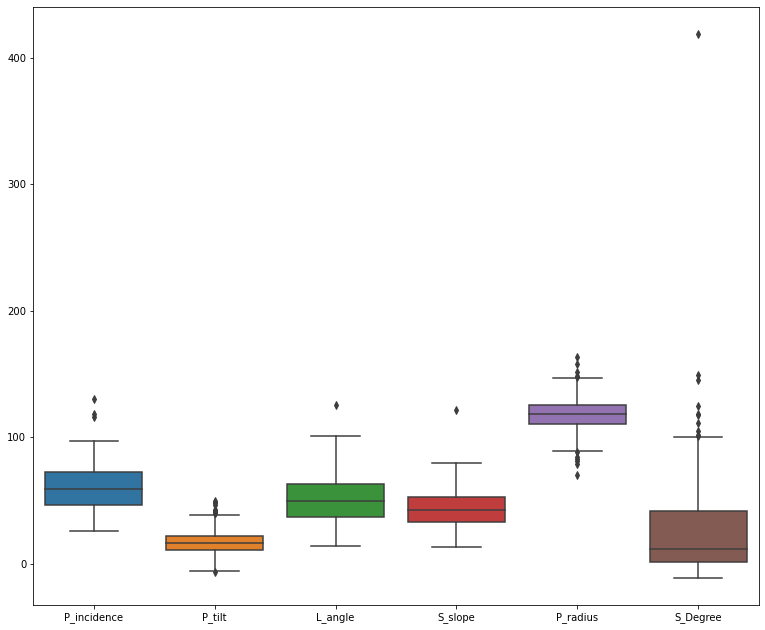

In [197]:
plt.figure(figsize=(13,11))
sns.boxplot(data=combined_Data)

### Few insights from the above figure:
#### a. Outliers are present in each feature 
#### b. Most features are mainly balanced while S_degree feature is right skewed and it has extreme maxima

## 4.A. Split data into X and Y

In [200]:
combined_Data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [212]:
X = combined_Data.drop(labels='Class', axis=1)
y = combined_Data['Class']

## 4. B. Split data into train and test with 80:20 proportion.

In [206]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,1.042177e-16,2.096889e-16,1.980495e-16,2.829278e-17,-5.071212e-16,-1.277204e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


In [213]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=1)

## 4.C. Train a Supervised Learning Classification base model using KNN classifier. 

In [215]:
KNC = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
# Call Nearest Neighbour algorithm

KNC.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

## 4.D. Print all the possible performance metrics for both train and test data.

In [216]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = KNC.predict(X_test)
KNC.score(X_test, y_test)

0.7258064516129032

Confusion Matrix


<AxesSubplot:>

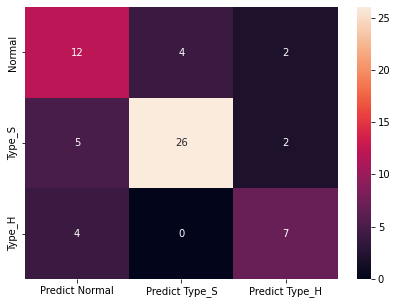

In [218]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal", "Type_S", "Type_H" ])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_S", 'Type_H']],
                  columns = [i for i in ["Predict Normal","Predict Type_S", "Predict Type_H"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


In [220]:
Accuracy = (12+26+7)/62

In [226]:
print('Accuracy of the model is %0.5f'  %Accuracy)

Accuracy of the model is 0.72581


## 5.A. Experiment with various parameters to improve performance of the base model.

In [268]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
KNC_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(KNC_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)


## 5.C. Clearly state which parameters contributed most to improve model performance. 

In [270]:
print('The value of best Hyperparameters')
print('Best leaf_size: %.2d' %best_model.best_estimator_.get_params()['leaf_size'])
print('Best p: %.2d' %best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors: %.2d' %best_model.best_estimator_.get_params()['n_neighbors'])

The value of best Hyperparameters
Best leaf_size: 01
Best p: 02
Best n_neighbors: 01


In [311]:
######################################################################################################################
######################################################################################################################
######################################################################################################################

# Part B

## 1.A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [442]:
data1 = pd.read_csv('Data1.csv')
data2 = pd.read_csv('Data2.csv')

### 1.B. Print shape and Column Names and DataTypes of both the Dataframes

In [443]:
data1.shape

(5000, 8)

In [444]:
data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [445]:
data1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [446]:
data2.shape

(5000, 7)

In [447]:
data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [448]:
data2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [449]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [450]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


## 1.C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [451]:
data_merged = pd.merge(data1, data2, on='ID')

In [452]:
data_merged.shape

(5000, 14)

## 1.D. Change Datatype of below features to ‘Object’ 
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [453]:
#column_conv = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

convert_dict = {'CreditCard': object,
                'InternetBanking': object,
                'FixedDepositAccount': object,
                'Security': object,
                'Level': object,
                'HiddenScore': object
                }

data_merged = data_merged.astype(convert_dict)

In [454]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


## 2.A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

In [455]:
data_merged['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

<AxesSubplot:>

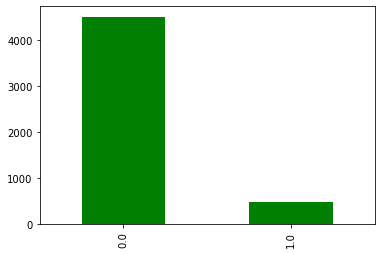

In [456]:
data_merged['LoanOnCard'].value_counts().plot(kind='bar', color='green')

#### On the basis of above figure, we can say that only a few customer has  loan on Credit card and majority of the person don't have loan on Credit card.

## 2.B. Check the percentage of missing values and impute if required. 

In [457]:
data_merged.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [458]:
percent_missing2 = data_merged.isnull().sum() * 100 / len(data_merged)
percent_missing_value_df = pd.DataFrame({'column_name': data_merged.columns,
                                 'percent_missing': percent_missing2})

In [459]:
percent_missing_value_df

,column_name,percent_missing
ID,ID,0.0
Age,Age,0.0
CustomerSince,CustomerSince,0.0
HighestSpend,HighestSpend,0.0
ZipCode,ZipCode,0.0
HiddenScore,HiddenScore,0.0
MonthlyAverageSpend,MonthlyAverageSpend,0.0
Level,Level,0.0
Mortgage,Mortgage,0.0
Security,Security,0.0


In [460]:
#### Since, maximum customers are of the category not having loan on credit card, we will replace NaN with 0.0

data_merged.fillna(0, inplace=True)

In [461]:
data_merged.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


#### From the above output, we can see that NaN has been replaced by 0.0

## 2.C. Check for unexpected values in each categorical variable and impute with best suitable value

In [462]:
data_merged.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [463]:
print(data_merged["CreditCard"].value_counts())
print(data_merged["InternetBanking"].value_counts())
print(data_merged["FixedDepositAccount"].value_counts())
print(data_merged["Security"].value_counts())
print(data_merged["Level"].value_counts())
print(data_merged["HiddenScore"].value_counts())

0    3530
1    1470
Name: CreditCard, dtype: int64
1    2984
0    2016
Name: InternetBanking, dtype: int64
0    4698
1     302
Name: FixedDepositAccount, dtype: int64
0    4478
1     522
Name: Security, dtype: int64
1    2096
3    1501
2    1403
Name: Level, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64


#### From the above output, we can see that there are no unexpected values in the categorical variables.

## 3.A. Split data into X and Y

In [464]:
X = data_merged.drop(columns=['ID', 'ZipCode', 'LoanOnCard'])
Y = data_merged['LoanOnCard']

## 3.B. Split data into train and test. Keep 25% data reserved for testing. 

In [465]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

## 3.C. Train a Supervised Learning Classification base model - Logistic Regression

In [466]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [467]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9448


## 3.D. Print evaluation metrics for the model and clearly share insights.

<AxesSubplot:>

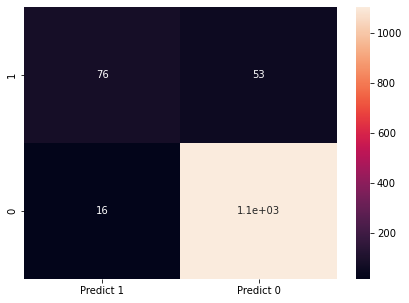

In [468]:
#predict on test
y_predict = model.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### True Positive: We correctly predicted that 76 customers have loan on credit card
#### True Negative: We correctly predicted that 1100 customers did not have loan on credit card
#### False Positive: For 16 customers, we predicted that should get loan but did not.
#### False negative: 53 customers were thought not have loan but they actually had loan.

## 3.E. Balance the data using the right balancing technique

In [469]:
data_merged['LoanOnCard'].value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

In [470]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data_merged[(data_merged['LoanOnCard']==0)] 
df_minority = data_merged[(data_merged['LoanOnCard']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4520, # to match majority class
                                 random_state=13)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [471]:
df_upsampled['LoanOnCard'].value_counts()

1.0    4520
0.0    4520
Name: LoanOnCard, dtype: int64

In [472]:
df_upsampled.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
3339,3340,27,1,141,95135,4,5.1,3,354,0,0,0,0,1.0
1674,1675,37,11,139,95814,2,0.8,2,421,0,0,1,0,1.0
781,782,56,32,158,94588,3,3.7,3,0,0,0,1,0,1.0
183,184,29,3,148,92173,3,4.1,1,0,0,0,1,0,1.0
2267,2268,38,13,168,92647,2,1.3,3,0,0,0,0,0,1.0


## 3.F. Again train the same previous model on balanced data

In [473]:
X_balanced = df_upsampled.drop(columns=['ID', 'ZipCode', 'LoanOnCard'])
Y_balanced = df_upsampled['LoanOnCard']

In [474]:
x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, Y_balanced, test_size=0.25, random_state=1)

In [475]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train_balanced, y_train_balanced)

LogisticRegression(solver='liblinear')

In [476]:
model_score_balanced = model.score(x_test_balanced, y_test_balanced)
print(model_score_balanced)

0.9039823008849558


## 3.G. Print evaluation metrics and clearly share differences observed

<AxesSubplot:>

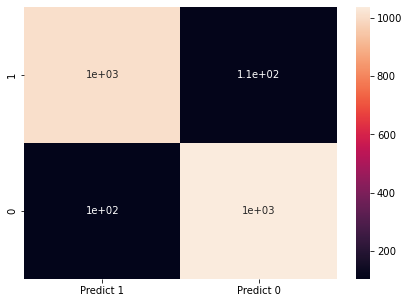

In [477]:
#predict on test
y_predict_balanced = model.predict(x_test_balanced)

cm=metrics.confusion_matrix(y_test_balanced, y_predict_balanced, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### True Positive: 1000 customers were predicted to have loan and they were actually having loan
#### True Negative: 1000 customers were predicted to not have loan and they were actually not having loan
#### False Positive: 100 customers were predicted to have loan but actually they were not having loan
#### False Negative: 110 customers were predicted to not have loan but they were actually having loan

## 4.A. Train a base model each for SVM, KNN

In [478]:
data_merged.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


In [481]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [482]:
#column_conv = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

convert_dict = {'CreditCard': object,
                'InternetBanking': object,
                'FixedDepositAccount': object,
                'Security': object,
                'Level': object,
                'HiddenScore': object
                }

data_merged = data_merged.astype(convert_dict)

In [483]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


In [488]:
Xbase = data_merged.drop(columns=['ID', 'ZipCode', 'LoanOnCard'])
Ybase = data_merged['LoanOnCard']
xbase_train, xbase_test, ybase_train, ybase_test = train_test_split(Xbase, Ybase, test_size=0.25, random_state=11)

### Build SVC model:

In [486]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)

In [489]:
clf.fit(xbase_train , ybase_train)

SVC(C=3, gamma=0.025)

In [491]:
ybase_pred = clf.predict(xbase_test)

In [497]:
model_score_svm = model.score(xbase_test, ybase_test)

In [498]:
model_score_svm

0.8992

### Build KNN model

In [509]:
KNC2 = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
# Call Nearest Neighbour algorithm

KNC2.fit(xbase_train, ybase_train)

KNeighborsClassifier(weights='distance')

In [506]:
model_score_knn = model.score(xbase_test, ybase_test)

## 4.B. Tune parameters for each of the models wherever required and finalize a model.

In [523]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
KNC2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(KNC2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(xbase_train,ybase_train)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/manishsingh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/xv/cmyxztln50s1hzlzdgk3xbch0000gn/T/ipykernel_5419/324127962.py", line 12, in <cell line: 12>
    best_model = clf.fit(xbase_train,ybase_train)
  File "/Users/manishsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 891, in fit
    self.best_index_ = self._select_best_index(
  File "/Users/manishsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 1392, in _run_search
  File "/Users/manishsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 838, in evaluate_candidates
  File "/Users/manishsingh/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "/Users/mani

## 4.C. Print evaluation metrics for final model.

<AxesSubplot:>

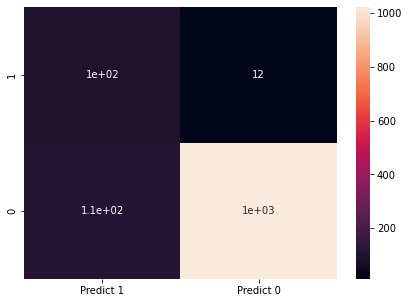

In [515]:
#predict on test
ybase_predict = model.predict(xbase_test)

cm=metrics.confusion_matrix(ybase_test, ybase_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## 4.D. Share improvement achieved from base model to final model.

In [518]:
Accuracy = (100+1000)/(1100+112)

In [522]:
print("Final Accuracy of the model is %.3f" %Accuracy)

Final Accuracy of the model is 0.908
